# Exploratory Data Analysis (EDA)

This notebook performs exploratory analysis of the cleaned and merged daily mean temperature and bicycle traffic data for Zurich. Both univariate and bivariate analyses, correlations, and a clustering analysis are included.

## Libraries and settings

Import the required libraries and set the main settings for exploratory data analysis.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.stats import f_oneway, chi2_contingency
import warnings

warnings.filterwarnings("ignore")
print(os.getcwd())

/workspaces/data_analytics_project/notebooks


## Load and prepare dataset

We load the merged weather and bicycle data, convert the date column, and create a total bike count variable for analysis.

In [3]:
# Load merged daily data (mean temperature only)
df = pd.read_csv("../data/merged_weather_bikes.csv")
df["date"] = pd.to_datetime(df["date"])

# Create total bike count column
df["VELO_IN"] = df["VELO_IN"].fillna(0)
df["VELO_OUT"] = df["VELO_OUT"].fillna(0)
df["bike_count"] = df["VELO_IN"] + df["VELO_OUT"]

print("Data shape:", df.shape)
print("\nFirst rows:")
print(df.head())
print("\nBasic statistics:")
print(df.describe())

Data shape: (359, 10)

First rows:
        date  temp_mean  humidity_mean  wind_speed_mean  precipitation_sum  \
0 2025-01-01   0.650000      86.083333         4.750000                0.0   
1 2025-01-02   3.141667      76.958333        12.662500               14.5   
2 2025-01-03  -0.308333      87.333333         5.908333                1.4   
3 2025-01-04  -1.900000      80.916667         3.183333                0.6   
4 2025-01-05   1.845833      93.000000         4.608333               15.0   

   VELO_IN  VELO_OUT  FUSS_IN  FUSS_OUT  bike_count  
0   5094.0    2558.0   1188.0    1099.0      7652.0  
1   5086.0    2423.0    541.0     448.0      7509.0  
2   9073.0    4420.0    450.0     404.0     13493.0  
3   7129.0    3551.0    457.0     388.0     10680.0  
4   5000.0    2641.0    630.0     565.0      7641.0  

Basic statistics:
                      date   temp_mean  humidity_mean  wind_speed_mean  \
count                  359  359.000000     359.000000       359.000000   
mean 

## Univariate analysis

We examine the distributions of key variables using histograms and descriptive statistics.

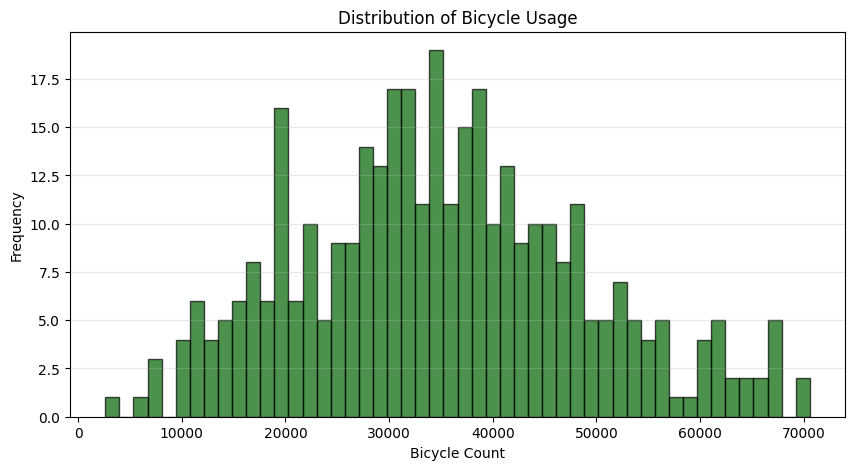

Bicycle count statistics:
Mean: 35067.90
Median: 34483.00
Std Dev: 13768.92


In [4]:
# Histogram of bicycle counts
plt.figure(figsize=(10, 5))
plt.hist(df["bike_count"], bins=50, color="darkgreen", alpha=0.7, edgecolor="black")
plt.xlabel("Bicycle Count")
plt.ylabel("Frequency")
plt.title("Distribution of Bicycle Usage")
plt.grid(axis="y", alpha=0.3)
plt.show()

print("Bicycle count statistics:")
print(f"Mean: {df['bike_count'].mean():.2f}")
print(f"Median: {df['bike_count'].median():.2f}")
print(f"Std Dev: {df['bike_count'].std():.2f}")

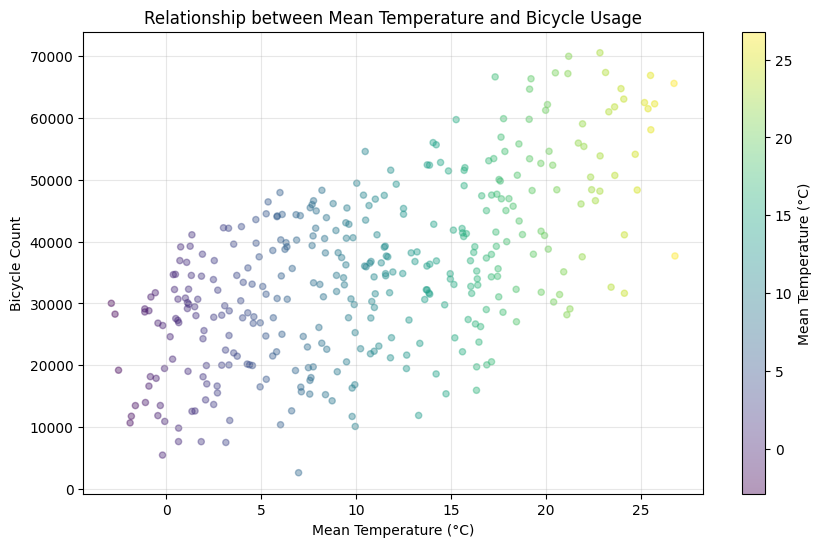

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df["temp_mean"],
    df["bike_count"],
    c=df["temp_mean"],          # Farbverlauf nach Temperatur
    cmap="viridis",             # gut unterscheidbarer Colormap
    alpha=0.4,
    s=20
)

plt.colorbar(label="Mean Temperature (°C)")
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Bicycle Count")
plt.title("Relationship between Mean Temperature and Bicycle Usage")
plt.grid(alpha=0.3)
plt.show()

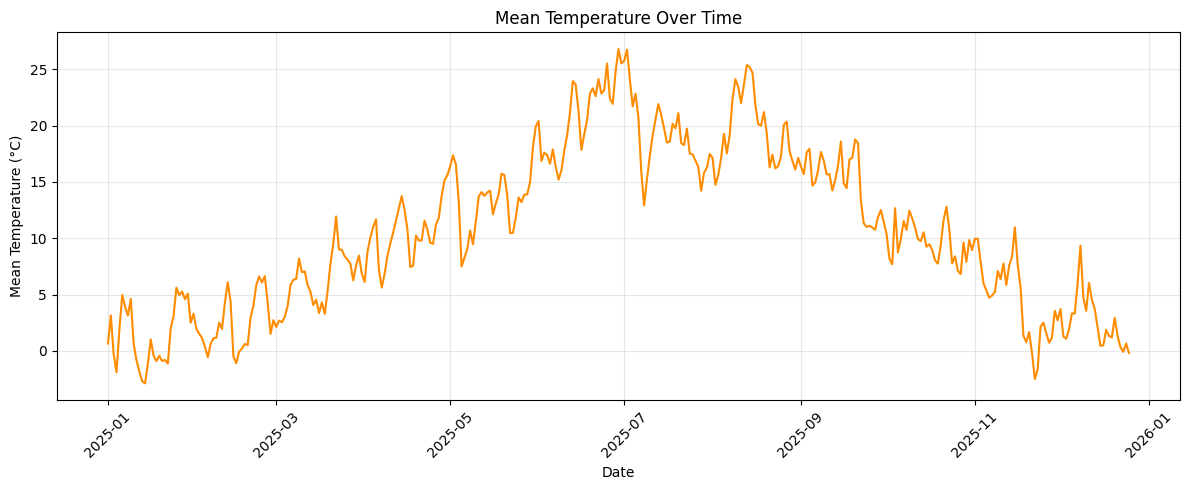

Mean Temperature statistics:
Mean: 10.58°C
Min: -2.89°C
Max: 26.79°C


In [6]:
# Time series plot: mean temperature over time
plt.figure(figsize=(12, 5))
plt.plot(df["date"], df["temp_mean"], color="darkorange", linewidth=1.5)
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.title("Mean Temperature Over Time")
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Mean Temperature statistics:")
print(f"Mean: {df['temp_mean'].mean():.2f}°C")
print(f"Min: {df['temp_mean'].min():.2f}°C")
print(f"Max: {df['temp_mean'].max():.2f}°C")

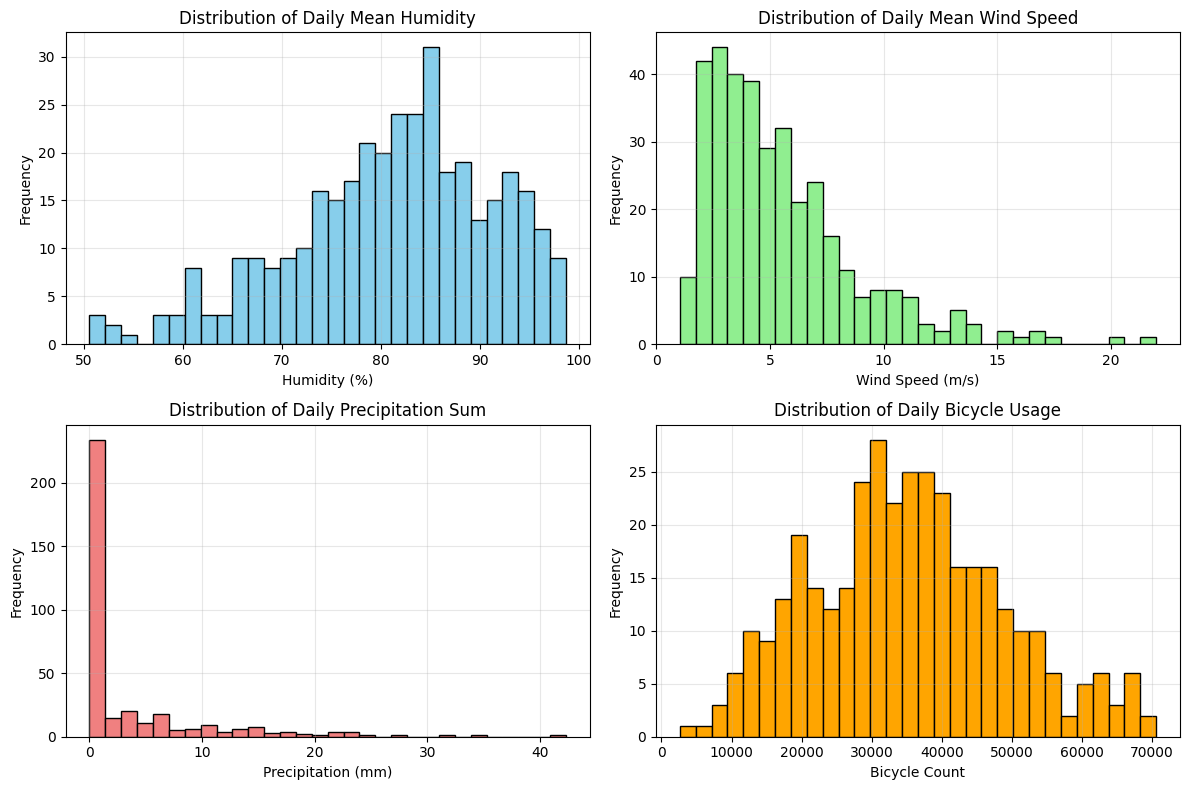

Histograms show the distribution of all weather features and bicycle usage.


In [7]:
# Histograms for all weather features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0,0].hist(df["humidity_mean"], bins=30, edgecolor="black", color="skyblue")
axes[0,0].set_xlabel("Humidity (%)")
axes[0,0].set_ylabel("Frequency")
axes[0,0].set_title("Distribution of Daily Mean Humidity")
axes[0,0].grid(True, alpha=0.3)

axes[0,1].hist(df["wind_speed_mean"], bins=30, edgecolor="black", color="lightgreen")
axes[0,1].set_xlabel("Wind Speed (m/s)")
axes[0,1].set_ylabel("Frequency")
axes[0,1].set_title("Distribution of Daily Mean Wind Speed")
axes[0,1].grid(True, alpha=0.3)

axes[1,0].hist(df["precipitation_sum"], bins=30, edgecolor="black", color="lightcoral")
axes[1,0].set_xlabel("Precipitation (mm)")
axes[1,0].set_ylabel("Frequency")
axes[1,0].set_title("Distribution of Daily Precipitation Sum")
axes[1,0].grid(True, alpha=0.3)

axes[1,1].hist(df["bike_count"], bins=30, edgecolor="black", color="orange")
axes[1,1].set_xlabel("Bicycle Count")
axes[1,1].set_ylabel("Frequency")
axes[1,1].set_title("Distribution of Daily Bicycle Usage")
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Histograms show the distribution of all weather features and bicycle usage.")

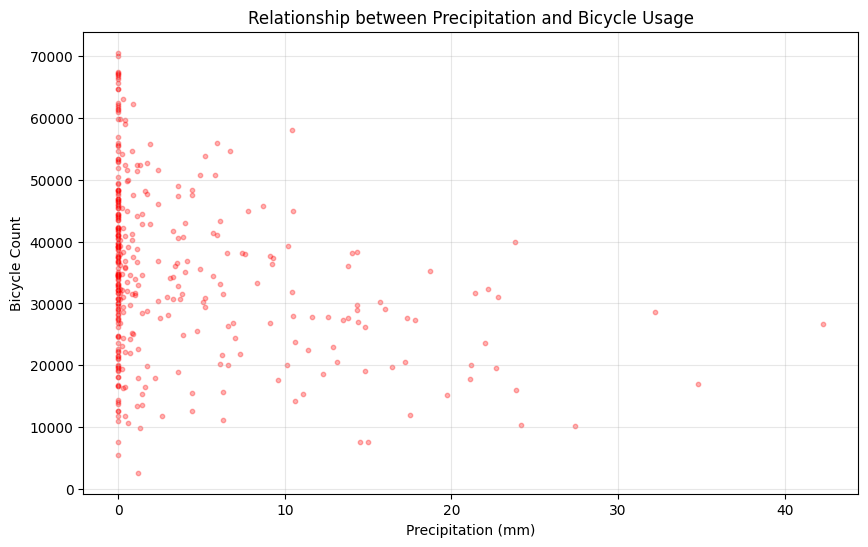

Correlation (Precipitation vs Bike Count): -0.296


In [8]:
# Scatter plot: precipitation vs bicycle count
if 'precipitation_sum' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df["precipitation_sum"], df["bike_count"], alpha=0.3, color="red", s=10)
    plt.xlabel("Precipitation (mm)")
    plt.ylabel("Bicycle Count")
    plt.title("Relationship between Precipitation and Bicycle Usage")
    plt.grid(alpha=0.3)
    plt.show()

    # Calculate correlation
    corr_precip_bikes = df["precipitation_sum"].corr(df["bike_count"])
    print(f"Correlation (Precipitation vs Bike Count): {corr_precip_bikes:.3f}")
else:
    print("No precipitation data available in this dataset.")

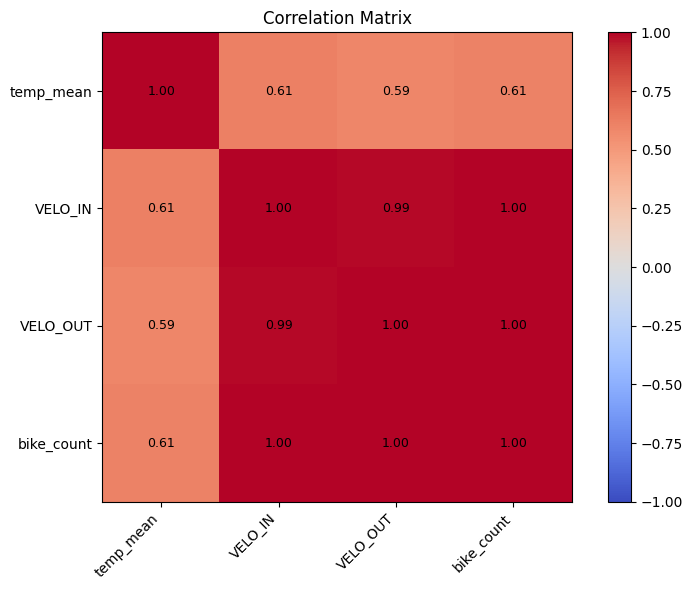


Correlation Matrix:
            temp_mean   VELO_IN  VELO_OUT  bike_count
temp_mean    1.000000  0.612458  0.593143    0.607092
VELO_IN      0.612458  1.000000  0.991561    0.999041
VELO_OUT     0.593143  0.991561  1.000000    0.996287
bike_count   0.607092  0.999041  0.996287    1.000000


In [9]:
# Correlation matrix
# Only use columns that actually exist in the DataFrame
possible_cols = ["temp_mean", "VELO_IN", "VELO_OUT", "bike_count"]
numeric_cols = [col for col in possible_cols if col in df.columns]
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
im = plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im)
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha="right")
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Matrix")

# Add correlation values to cells
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        text = plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                        ha="center", va="center", color="black", fontsize=9)

plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
print(corr_matrix)

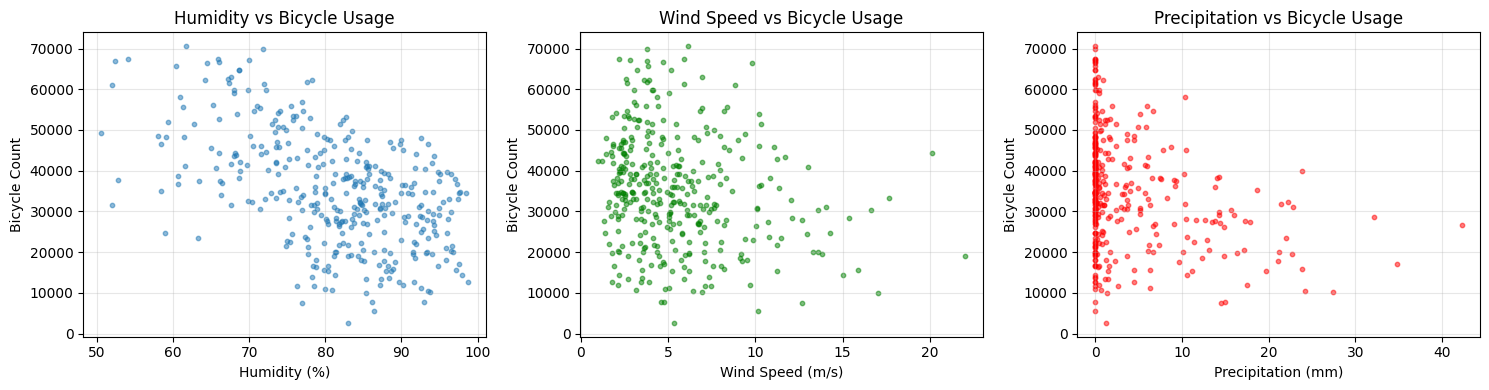

Scatter plots reveal negative correlations for humidity, wind speed, and precipitation.


In [10]:
# Additional scatter plots for new weather features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Humidity vs bike count
axes[0].scatter(df["humidity_mean"], df["bike_count"], alpha=0.5, s=10)
axes[0].set_xlabel("Humidity (%)")
axes[0].set_ylabel("Bicycle Count")
axes[0].set_title("Humidity vs Bicycle Usage")
axes[0].grid(True, alpha=0.3)

# Wind speed vs bike count
axes[1].scatter(df["wind_speed_mean"], df["bike_count"], alpha=0.5, s=10, color="green")
axes[1].set_xlabel("Wind Speed (m/s)")
axes[1].set_ylabel("Bicycle Count")
axes[1].set_title("Wind Speed vs Bicycle Usage")
axes[1].grid(True, alpha=0.3)

# Precipitation vs bike count
axes[2].scatter(df["precipitation_sum"], df["bike_count"], alpha=0.5, s=10, color="red")
axes[2].set_xlabel("Precipitation (mm)")
axes[2].set_ylabel("Bicycle Count")
axes[2].set_title("Precipitation vs Bicycle Usage")
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Scatter plots reveal negative correlations for humidity, wind speed, and precipitation.")

## ANOVA: Comparison of mean bicycle usage by weekday

We use a one-way ANOVA to test if the average bicycle usage differs significantly between weekdays. A low p-value (< 0.05) indicates a significant difference.

In [11]:
# Ensure that the 'dayofweek' column exists
if 'dayofweek' not in df.columns:
    if 'date' in df.columns:
        df['dayofweek'] = df['date'].dt.dayofweek
    else:
        print('No date column available for extracting weekday.')

# Extract groups for each weekday (0=Monday, 6=Sunday)
if 'dayofweek' in df.columns:
    groups = [df[df['dayofweek'] == i]['bike_count'] for i in range(7)]

    # Perform ANOVA test
    anova_stat, anova_p = f_oneway(*groups)

    print("ANOVA: Comparison of mean bicycle usage by weekday")
    print(f"F-statistic: {anova_stat:.3f}")
    print(f"p-value: {anova_p:.4f}")

    if anova_p < 0.05:
        print("✓ There are significant differences between weekdays (p < 0.05)")
    else:
        print("✗ No significant difference between weekdays (p ≥ 0.05)")
else:
    print('No dayofweek column available for ANOVA.')

ANOVA: Comparison of mean bicycle usage by weekday
F-statistic: 20.775
p-value: 0.0000
✓ There are significant differences between weekdays (p < 0.05)


# ANOVA - Confirmation of the Anova Test

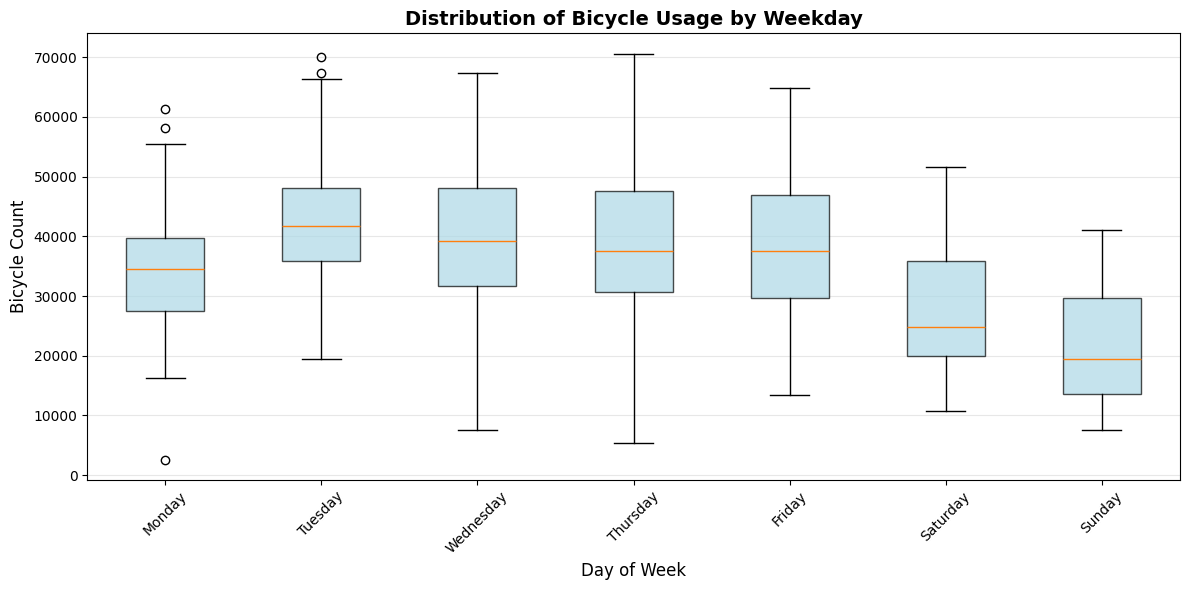


Mean bicycle count by weekday:
Monday: 34322.67
Tuesday: 42777.06
Wednesday: 40491.10
Thursday: 39487.46
Friday: 38250.25
Saturday: 28465.76
Sunday: 21487.98


In [12]:
# Boxplot: Bicycle count by weekday
if 'dayofweek' in df.columns:
    # Create boxplot data
    weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    plt.figure(figsize=(12, 6))
    
    # Prepare data for boxplot
    boxplot_data = [df[df['dayofweek'] == i]['bike_count'].values for i in range(7)]
    
    # Create boxplot
    bp = plt.boxplot(boxplot_data, labels=weekday_names, patch_artist=True)
    
    # Customize colors
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')
        patch.set_alpha(0.7)
    
    plt.xlabel('Day of Week', fontsize=12)
    plt.ylabel('Bicycle Count', fontsize=12)
    plt.title('Distribution of Bicycle Usage by Weekday', fontsize=14, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print mean values for each weekday
    print("\nMean bicycle count by weekday:")
    for i, day in enumerate(weekday_names):
        mean_count = df[df['dayofweek'] == i]['bike_count'].mean()
        print(f"{day}: {mean_count:.2f}")
else:
    print('No dayofweek column available for boxplot visualization.')

## Chi-squared test: Association between weather category and high bicycle usage

We use a Chi-squared test to check if there is a significant association between weather conditions (e.g., 'good' vs. 'bad' weather) and the frequency of high bicycle usage days. A low p-value (< 0.05) indicates a significant association.

In [13]:
# Define 'good' weather as days with temperature >= median and precipitation < median
temp_median = df['temp_mean'].median()
if 'precipitation_sum' in df.columns:
    precip_median = df['precipitation_sum'].median()
    df['weather_cat'] = np.where((df['temp_mean'] >= temp_median) & (df['precipitation_sum'] < precip_median), 'good', 'bad')
else:
    df['weather_cat'] = np.where(df['temp_mean'] >= temp_median, 'good', 'bad')

# Define 'high' bicycle usage as bike_count >= median
bike_median = df['bike_count'].median()
df['bike_usage_cat'] = np.where(df['bike_count'] >= bike_median, 'high', 'low')

# Create contingency table
contingency = pd.crosstab(df['weather_cat'], df['bike_usage_cat'])
print('Contingency table:')
print(contingency)

# Perform Chi-squared test only if contingency table is not empty and has at least 2 rows and 2 columns
if contingency.shape[0] >= 2 and contingency.shape[1] >= 2:
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f'Chi-squared statistic: {chi2:.3f}')
    print(f'p-value: {p:.4f}')
    if p < 0.05:
        print('✓ There is a significant association between weather and high bicycle usage (p < 0.05)')
    else:
        print('✗ No significant association between weather and high bicycle usage (p ≥ 0.05)')
else:
    print('Not enough data for Chi-squared test (need at least 2x2 table).')

Contingency table:
bike_usage_cat  high  low
weather_cat              
bad              119  164
good              61   15
Chi-squared statistic: 33.483
p-value: 0.0000
✓ There is a significant association between weather and high bicycle usage (p < 0.05)


## K-means clustering analysis

We apply unsupervised learning to identify distinct patterns in the data using K-means clustering with the elbow method and silhouette score evaluation.

In [14]:
# -------------------------------------------------
# Prepare features for clustering (daily data)
# -------------------------------------------------

# Extract weekday from date
if "date" in df.columns:
    df["dayofweek"] = df["date"].dt.dayofweek
else:
    print("No date column available for extracting weekday.")

# Select clustering features (daily-level, methodically correct)
clustering_features = ["temp_mean", "bike_count", "dayofweek"]

# Drop rows with missing values
X = df[clustering_features].dropna()

# -------------------------------------------------
# Check if clustering is possible
# -------------------------------------------------
if X.shape[0] < 10:
    print("Clustering skipped: not enough valid data for meaningful clustering.")
else:
    # -------------------------------------------------
    # Standardize features
    # -------------------------------------------------
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print("Features used for clustering:")
    print(clustering_features)
    print(f"Scaled data shape: {X_scaled.shape}")

Features used for clustering:
['temp_mean', 'bike_count', 'dayofweek']
Scaled data shape: (359, 3)


In [15]:
# Elbow method to find optimal k
if 'X_scaled' not in locals() or X.shape[0] < 10:
    print("Clustering analysis skipped: not enough valid data for meaningful clustering.")
else:
    inertias = []
    silhouette_scores = []
    k_range = range(2, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

    print("Elbow method results:")
    for k, inertia, silhouette in zip(k_range, inertias, silhouette_scores):
        print(f"k={k}: Inertia={inertia:.2f}, Silhouette Score={silhouette:.3f}")

Elbow method results:
k=2: Inertia=685.13, Silhouette Score=0.308
k=3: Inertia=463.15, Silhouette Score=0.337
k=4: Inertia=358.76, Silhouette Score=0.339
k=5: Inertia=301.43, Silhouette Score=0.312
k=6: Inertia=257.42, Silhouette Score=0.320
k=7: Inertia=231.80, Silhouette Score=0.298
k=8: Inertia=208.08, Silhouette Score=0.301
k=9: Inertia=188.77, Silhouette Score=0.300
k=10: Inertia=173.45, Silhouette Score=0.293


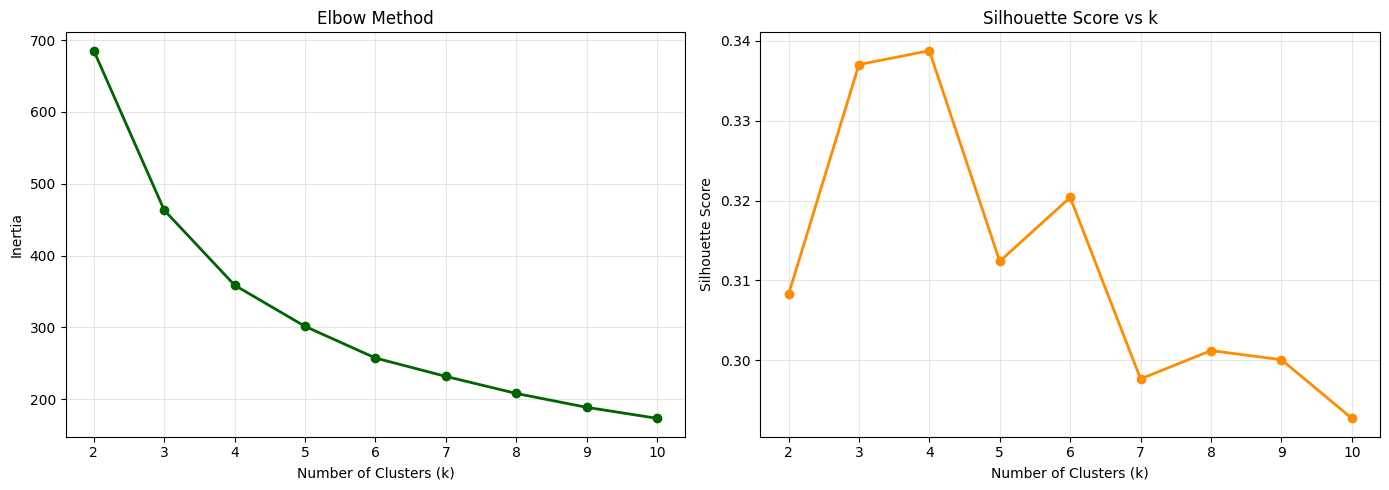

In [16]:
# Plot elbow curve
if 'X_scaled' not in locals() or X.shape[0] < 10:
    print("Clustering plot skipped: not enough valid data for meaningful clustering.")
else:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Elbow plot
    ax1.plot(k_range, inertias, marker="o", color="darkgreen", linewidth=2)
    ax1.set_xlabel("Number of Clusters (k)")
    ax1.set_ylabel("Inertia")
    ax1.set_title("Elbow Method")
    ax1.grid(alpha=0.3)

    # Silhouette score plot
    ax2.plot(k_range, silhouette_scores, marker="o", color="darkorange", linewidth=2)
    ax2.set_xlabel("Number of Clusters (k)")
    ax2.set_ylabel("Silhouette Score")
    ax2.set_title("Silhouette Score vs k")
    ax2.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

In [17]:
# Train final k-means model with optimal k
if 'X_scaled' not in locals() or X.shape[0] < 10:
    print("Final clustering skipped: not enough valid data for meaningful clustering.")
else:
    optimal_k = 3  # Based on elbow method
    kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    clusters = kmeans_final.fit_predict(X_scaled)
    df["cluster"] = clusters

    print(f"Optimal k: {optimal_k}")
    print(f"Silhouette Score: {silhouette_score(X_scaled, clusters):.3f}")
    print(f"\nCluster distribution:")
    print(df["cluster"].value_counts().sort_index())

Optimal k: 3
Silhouette Score: 0.337

Cluster distribution:
cluster
0    122
1    104
2    133
Name: count, dtype: int64


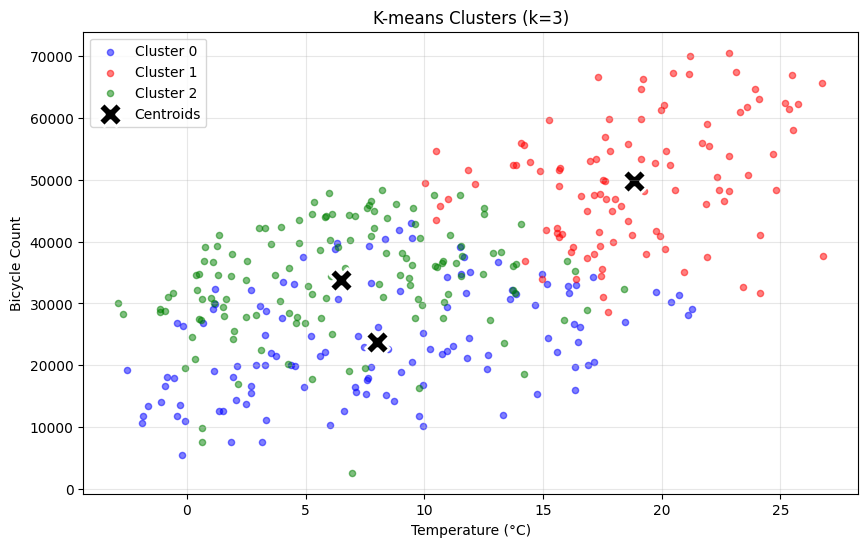

In [18]:
# Visualize clusters (temperature vs bike_count)
if 'X_scaled' not in locals() or X.shape[0] < 10 or 'cluster' not in df.columns:
    print("Cluster visualization skipped: not enough valid data for meaningful clustering.")
else:
    plt.figure(figsize=(10, 6))
    colors = ["blue", "red", "green"]

    for cluster in range(optimal_k):
        mask = df["cluster"] == cluster
        plt.scatter(df[mask]["temp_mean"], df[mask]["bike_count"], 
                   label=f"Cluster {cluster}", alpha=0.5, s=20, color=colors[cluster % len(colors)])

    # Plot cluster centers (transformed back to original scale)
    centers_scaled = kmeans_final.cluster_centers_
    centers_original = scaler.inverse_transform(centers_scaled)
    plt.scatter(centers_original[:, 0], centers_original[:, 1], 
               marker="X", s=300, color="black", edgecolors="white", linewidths=2, label="Centroids")

    plt.xlabel("Temperature (°C)")
    plt.ylabel("Bicycle Count")
    plt.title(f"K-means Clusters (k={optimal_k})")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

In [19]:
# Cluster interpretation
if 'X_scaled' not in locals() or X.shape[0] < 10 or 'cluster' not in df.columns:
    print("Cluster interpretation skipped: not enough valid data for meaningful clustering.")
else:
    print("\nCluster Characteristics:")
    for cluster in range(optimal_k):
        cluster_data = df[df["cluster"] == cluster]
        print(f"\nCluster {cluster}:")
        print(f"  Size: {len(cluster_data)} observations")
        print(f"  Avg Temperature: {cluster_data['temp_mean'].mean():.2f}°C")
        if 'precipitation_sum' in cluster_data.columns:
            print(f"  Avg Precipitation: {cluster_data['precipitation_sum'].mean():.2f} mm")
        if 'humidity_mean' in cluster_data.columns:
            print(f"  Avg Humidity: {cluster_data['humidity_mean'].mean():.2f}%")
        print(f"  Avg Bike Count: {cluster_data['bike_count'].mean():.2f}")


Cluster Characteristics:

Cluster 0:
  Size: 122 observations
  Avg Temperature: 8.01°C
  Avg Precipitation: 4.12 mm
  Avg Humidity: 83.18%
  Avg Bike Count: 23787.52

Cluster 1:
  Size: 104 observations
  Avg Temperature: 18.84°C
  Avg Precipitation: 2.37 mm
  Avg Humidity: 72.64%
  Avg Bike Count: 49851.91

Cluster 2:
  Size: 133 observations
  Avg Temperature: 6.47°C
  Avg Precipitation: 3.90 mm
  Avg Humidity: 85.93%
  Avg Bike Count: 33854.88


## Conclusions

This exploratory data analysis revealed important patterns in the relationship between weather and bicycle usage. We identified positive correlations with temperature and negative correlations with precipitation and humidity. The K-means clustering analysis identified 3 distinct usage patterns, suggesting that users have different behaviors under different weather conditions.

### Jupyter notebook --footer info--

In [20]:
import os
import platform
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2026-01-09 15:13:06
Python Version: 3.12.3
-----------------------------------
